# Github Data Analysis

* Sean Smith <swsmith@bu.edu> 
* Ann Ming Samborski <asambors@bu.edu>

# Questions We Strive to Address
1. What are the most popular coding languages? How has this changed over time? How does this data compare to StackOverflow?
2. Given the features shown below, can we predict number of stars? 
3. Is there a specific subset of the features below (besides the entirety) that optimizes the accuracy of star prediction? 
4. Does lines of code correlate with number of stars?
5. Do number of contributors correlate with number of stars?

# Differences From Our Initial Report
In our initial report submission, we focused on the popularity of languages and spoke mainly about how we'd like to study the rise and fall of different languages as a function of time. However, we realize that while we would love to compare GitHub's data to StackOverflow, there was still a lot more that we could do with the data collected.

That being said, we now switch over to a focus on stars. We would like to see what combination of feature vectors (features shown below) can be used to best predict the number of stars a repository will have. Clearly, we would like to explore how to best minimize features required (i.e. is a question like (2) above a fair one to ask? Is it possible that one feature can be enough information to predict on?).

## Dataset
We collected `137,100` repositories. To do so we used the Github API. 

| Name          | Description   |
| ------------- |:--------------|
| name          | Owner/Repository name |
| owner         | Owner name |
| watchers      | Number of watchers |
| stars         | Number of stars |
| forks         | Number of forks |
| type          | Type of account, organization or user |
| issues        | Number of issues|
| created_at    | Date created |
| pushed_at     | Date last pushed |
| updated_at    | Date last updated |
| size          | Size of repo in KB|
| open_issues   | Number of open issues |
| description   | Repositry description |
| num_languages | Number of programming languages |
|language_1     | Most popular language |
|language_1_size| Most popular language size in bytes |
|language_2     | Second most popular language |
|language_2_size| Second most popular language size in bytes |
|language_3     | Third most popular language |
|language_3_size| Third most popular language size in bytes |

## Data Collection Code

Please see our initial report on our data and how we collected it for details. 

## Data

In [1]:
# INCLUDES
import requests
from pprint import pprint
import collections
import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
# Read in data
df = pd.read_csv('github_data.csv')

In [4]:
df.head(5)

,name,owner,watchers,stars,forks,type,issues,created_at,pushed_at,updated_at,size,open_issues_count,description,num_languages,language_1,language_1_size,language_2,language_2_size,language_3,language_3_size
0,mojombo/grit,mojombo,59,1883,451,User,3,2007-10-29T14:37:16Z,2016-08-01T15:17:38Z,2017-04-19T11:01:12Z,7954,3,**Grit is no longer maintained. Check out libg...,1,Ruby,219981.0,NaN,NaN,NaN,NaN
1,wycats/merb-core,wycats,3,407,54,User,0,2008-01-12T05:50:53Z,2008-10-13T02:31:34Z,2017-04-23T16:05:54Z,3462,0,Merb Core: All you need. None you don't.,2,Ruby,948883.0,JavaScript,8925.0,NaN,NaN
2,rubinius/rubinius,rubinius,120,2692,612,Organization,211,2008-01-12T16:46:52Z,2017-04-22T23:00:00Z,2017-04-23T09:34:21Z,162886,211,The Rubinius Language Platform,13,Ruby,7352918.0,C++,2917738.0,C,522111.0
3,mojombo/god,mojombo,104,2036,479,User,112,2008-01-13T05:16:23Z,2017-03-01T00:00:23Z,2017-04-23T14:44:01Z,2639,112,Ruby process monitor,6,Ruby,283939.0,C,9261.0,CSS,6486.0
4,vanpelt/jsawesome,vanpelt,2,36,2,User,0,2008-01-13T06:04:19Z,2008-05-29T20:09:36Z,2017-03-29T18:09:21Z,192,0,Awesome JSON,2,JavaScript,126588.0,Ruby,9677.0,NaN,NaN


In [5]:
df.shape

(137100, 20)

In [6]:
df.type.value_counts()

User            130069
Organization      7031
Name: type, dtype: int64

## Most Popular Programming Language

In [7]:
df.language_1.value_counts()

Ruby                   36351
JavaScript             15032
Python                 11333
PHP                     7484
Java                    6384
C                       6070
Perl                    5027
C++                     4391
Objective-C             2852
C#                      2158
Shell                   1999
Emacs Lisp              1802
VimL                    1254
ActionScript            1072
Erlang                   976
Haskell                  900
Scala                    774
Clojure                  718
Lua                      677
Common Lisp              520
HTML                     389
CSS                      376
Groovy                   356
Scheme                   268
Vim script               181
OCaml                    170
Go                       168
Visual Basic             144
Objective-J              121
TeX                      107
                       ...  
Diff                       1
Smarty                     1
Nim                        1
Hack          

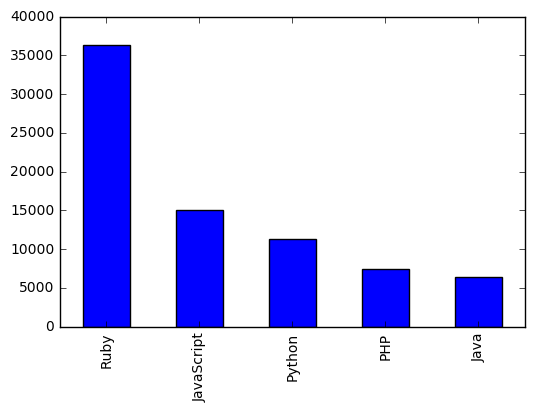

In [8]:
df.language_1.value_counts()[:5].plot.bar()

In [9]:
ruby_popularity = df[df.language_1 == 'Ruby'].filter(['language_1_size', 'created_at'])

Min: 2007-10-29T14:37:16Z
Max: 2010-06-24T18:44:50Z


(0, 20000000)

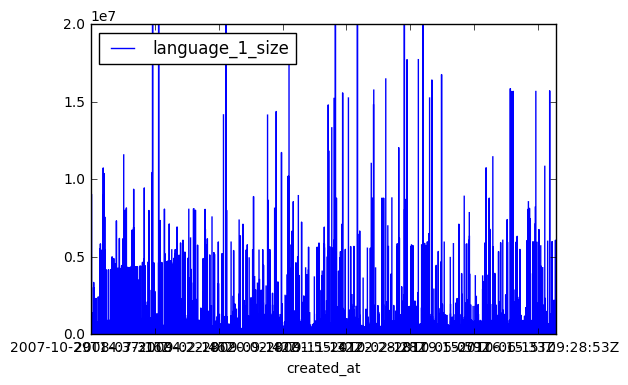

In [10]:
# import matplotlib.pyplot as plt
# axes = plt.subplot()
print("Min: %s" % ruby_popularity.created_at.min())
print("Max: %s" % ruby_popularity.created_at.max())

# bins = ruby_popularity.created_at.hist(bins=10)
# bins[0][0].x_label('created_at')
plt = ruby_popularity.plot(x='created_at', y='language_1_size')
plt.set_ylim([0,20000000])

# Forks vs Stars

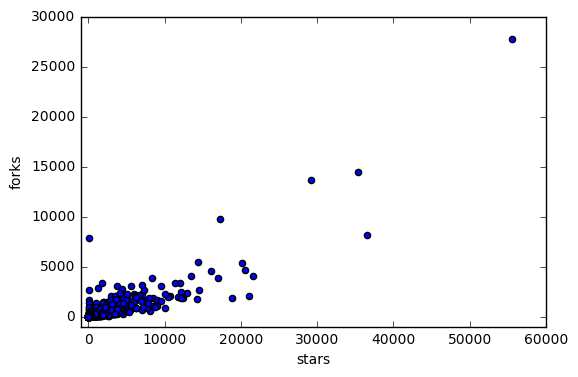

In [20]:
df.plot.scatter(x='stars', y='forks', xlim=[-1000,60000], ylim=[-1000,30000])

# Can we predict the number of stars a repository has?